<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-Big-Picture-(via-Ramsey's-optimal-accumulation-example):" data-toc-modified-id="The-Big-Picture-(via-Ramsey's-optimal-accumulation-example):-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Big Picture (via Ramsey's optimal accumulation example):</a></span></li><li><span><a href="#Exercise-0" data-toc-modified-id="Exercise-0-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 0</a></span><ul class="toc-item"><li><span><a href="#Throwback-Thursday!" data-toc-modified-id="Throwback-Thursday!-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Throwback Thursday!</a></span></li></ul></li><li><span><a href="#Exercise-1" data-toc-modified-id="Exercise-1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise 1</a></span></li><li><span><a href="#Exercise-2-(Analytical-beefcaking)" data-toc-modified-id="Exercise-2-(Analytical-beefcaking)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 2 (Analytical beefcaking)</a></span></li><li><span><a href="#Exercise-3-(Computational-beefcaking)" data-toc-modified-id="Exercise-3-(Computational-beefcaking)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise 3 (Computational beefcaking)</a></span></li><li><span><a href="#Exercise-4-(More-beefcaking)" data-toc-modified-id="Exercise-4-(More-beefcaking)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exercise 4 (More beefcaking)</a></span></li><li><span><a href="#Exercise-5" data-toc-modified-id="Exercise-5-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exercise 5</a></span></li><li><span><a href="#Optional-exercise-for-the-serious-student" data-toc-modified-id="Optional-exercise-for-the-serious-student-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Optional exercise for the serious student</a></span></li></ul></div>



Author: [MachinaFantasma](https://github.com/phantomachine) | [Twitter](https://twitter.com/machinafantasma)


**Key Learning Points**

Ideas:

* From theory (pencil and paper) to code implementation

* Backward induction for finite $T$

* Banach's fixed point theorem for infinite $T$

    * Bellman functionals and value functions as fixed points
    
    * From theorem to Successive Approximation algorithm design

Skills/Python:

* 1D Function Approximation and Interpolation
* 1D optimization

Economics:

* Optimal control policy
* Valuation of an optimal program

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.interpolate as interpolate
import matplotlib.mlab as mlab   # For plotting given distribution functions
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import cm
from IPython.display import Image

## The Big Picture (via Ramsey's optimal accumulation example):

**What you already know**. In lectures so far we began with lessons from the classical microeconomics of consumer and general equilibrium theory. We recalled the following example of convex preference and production sets (with smooth preference and production functions), and its insights: 

* A (set of) necessary (and sufficient) condition(s) for equilibrium is that the consumer's preference-driven *marginal rate of substitution* (MRS) between any arbitrary two goods (say good $x$ and good $y$) would be equalized with the *marginal rate of tranformation* (MRT) of the two goods.

* The resulting equilibrium allocation of the goods is supported by a price system (relative prices) that equates with the consumer's MRS and also with the firm's MRT.

**Making the connection to macro**. We then began with a homogenous-good production economy, where there is a finite-horizon dynamic consumption planning problem, as a concrete example. Recalling the Fundamental Welfare Theorems (FWT) of general equilibrium, we could write the market equilibrium problem as a first-best social planning problem (where a price system is not explicitly required to coordinate allocations). This was the problem of choosing a sequence $\mathbf{a} \equiv ( (c_{0}, k_{1}), (c_{1}, k_{2}), ..., (c_{T}, k_{T+1}))$ such that we attain a maximal value:
$$
    V_{T}(k_{0}) = \max_{\mathbf{a}} \left\{ \sum_{t=0}^{T} \beta^{t} U(c_{t}) : k_{t+1} = f(k_{t}) - c_{t}, k_{0} = a \right\},
$$
where $a \in (0,\infty)$ is given, and, $k_{t}$ is a stock of capital fixed at the start of date $t$. The functions $U$ and $f$ are strictly increasing, strictly concave, twice-continuously differentiable and satisfy the usual Inada conditions (so that optimum solutions are guaranteed to be always in the interior of the commodity space, and, unique). 

We ended up with the necessary (and sufficient) conditions for an optimum (equivalently via FWT, for a competitive equilibrium) that says exactly the same thing you've learned from microeconomics (just relabel $x$ and $y$ to date-$t$ and date-$(t+1)$ contingent goods!):
$$
    \frac{\beta U_{c}[g_{t+1}(k_{t+1})]}{U_{c}[g_{t}(k_{t})]} = \frac{1}{f_{k}(k_{t+1})};
$$
and, of course, not forgetting that an optimum (or here, equivalently an equilibrium) solution must be feasible:
$$
    k_{t+1} = f(k_{t}) - g_{t}(k_{t}),
$$
for every date $t \in \{0, ...,T\}$.

where the $(T+1)$ number of functions, $(t, k_{t}) \mapsto g_{t}(k_{t})$ for every $t \in \{0, ...,T\}$ are the sequence of *optimal/equilibrium consumption functions* to be solved for. That is, they give us a value of (optimal/equilibrium) consumption $c_{t}$ as a function of the date $t$ and the state (stock of capital) of the economy $k_{t}$, at the start of date $t$.

**Economics Takeaway**: In the neoclassical models, because the FWTs hold, it is easier to solve an *planner*'s *optimal allocation* (dynamic programming) problem first and then work out the corresponding *competitive equilibrium* pricing functions as a function of the equivalent planner's allocation.

Even when the FWTs fails (e.g., in models with missing (incomplete) markets, monopolistic distortions, or constractual and informational frictions), quite often the problem of directly solving for a (suboptimal) *competitive equilibrium* can still be recursified as a modified dynamic programming problem subject to additional complications/constraints.

## Exercise 0

Let $U(c) = \ln(c)$ and $f(k) = k^{\alpha}$, where $\alpha \in (0,1)$. Set $\beta = 1$.

1. Let $T = 2$. Solve for the sequence of value and consumption (demand) *functions* $\left\{ (t, k_{t}) \mapsto g_{t}(k_{t}): t = 0, ...,T \right\}$.

2. Design a pseudocode that reflects what you just did by hand in the last question. (Hint: Can you decipher the source code/methods below and summarize that as an accurate yet human-readable list of instructions?)

2. Implement/write a Python program to solve this example for any value of $T$. Set $\alpha = 0.333$. (The source methods are given to you below.)

In [85]:
# Model primitives

def u(c, θ):
    """Utility function: CRRA class
    
    Note: Theoretically, u'(c) -> \infty when 
    c -> 0 ("in the limit"). Practically, we may 
    have instances where c=0 ("at the limit").
    A small number, say, 1e-18 is added to prevent
    a "division-by-zero" error.
    """
    if θ == 1.0:
        youtiao = np.log(c)
    elif θ > 0.0 and θ != 1.0:
        youtiao = ((c)**(1.0-θ) - 1.0)/(1.0-θ)
    return youtiao

def f(k, α):
    """Cobb-Douglas production function (per capita)"""
    sifan = k**α
    return sifan

def f_prime(k, α):
    """Cobb-Douglas production function (per capita)"""
    return α*k**(α-1.0)

def C_TotalResources(k, knext, α):
    """Resource constraint - returns c, consumption"""
    xiangjiao = f(k, α) - knext
    return xiangjiao

In [91]:
def FunctionFit(X, Y, kind='linear'):
    """Given discrete data (x,y) \in X x Y,
    Find a continuous approximant function f that
    rationalizes finite data. 
    
    Two flavors:
    linear : linear bases
    cubic  : cubic spline
    """
    if kind == 'linear':
        f = interpolate.interp1d(X,Y)
    elif kind == 'cubic':
        f = interpolate.interp1d(X,Y,kind='cubic')
    return f

In [92]:
def Bellman(V_next_fitted, X, α, β, θ):
    """RHS of Bellman equation is a max. problem
    Assumes input V_next_fitted is interpolant object
    - either analytic or SciPy interpolated using
      continuous basis functions
    """
    # Pre-allocate array space
    g = np.empty(X.size)
    h = g.copy()
    V = g.copy()
    
    # Define Objective Function at fixed k
    fungsiobjektif = lambda k_next, k: -u(f(k, α) - k_next, θ) \
                                        - β*V_next_fitted(k_next) 
            
    # Loop over current states in X
    for idx_k, k in enumerate(X):     
        # Solve max. problem to get g(t)(k), V(t)(k)
        k_lb = X.min()
        k_ub = f(k, α)
        knext_opt, val, ierr, numfeval = opt.fminbound(fungsiobjektif, 
                                       k_lb, k_ub, 
                                       args=(k,),
                                       full_output=True,
                                      )
        g[idx_k] = knext_opt
        # Value at optimum, given k
        V[idx_k] = -val
        # Back out c = h(k), store it
        c_opt = C_TotalResources(k, knext_opt, α)
        h[idx_k] = c_opt
        
    # Fitted (interpolants) policy functions
    g_fitted = FunctionFit(X, g, kind='cubic')
    h_fitted = FunctionFit(X, h, kind='cubic')
    V_fitted = FunctionFit(X, V, kind='cubic')
    
    # Bento box
    result = { 'saving': g_fitted,
               'consumption': h_fitted,
               'value': V_fitted,
               'saving-raw': g,
               'consumption-raw': h,
               'value-raw': V,
    }
    return result

In [93]:
def BackwardInduction_Bellman(X, α, β, θ, T=2):
    # Stage T+1 (scrap) value function
    V_next = np.zeros(X.size)
    V_next_fit = FunctionFit(X, V_next)
    V_list = [ V_next_fit ]

    # List containing sequence of policy functions
    g_list = [ ]
    h_list = [ ]

    # Backward induction loop
    for t in range(T, -1, -1):
        # Get optimizers satisfying stage-t Euler functional
        print("Solving Stage t = %i problem" %(t))
        result = Bellman(V_next_fit, X, α, β, θ)
        # Concatenate stage t policies to list of policy functions
        g_list.append(result['saving'])
        h_list.append(result['consumption'])
        V = result['value']
        V_list.append(V)
        # Use current V_t as t-1 stage input
        V_next_fit = V

    # Re-order g_list, h_list by natural time order
    g_list = g_list[::-1] # k(t+1) = g(t)(k(t))
    h_list = h_list[::-1] #   c(t) = h(t)(k(t))
    V_list = V_list[::-1]
    return g_list, h_list, V_list

In [98]:
# Planning horizon
T = 2

# Model parameters
θ = 1.0
α = 0.3333
β = 0.98
A = 1.0

# Discretized state space
N_states = 100
k_min = 1e-12
k_max = (1.0/A)**(1.0/(α-1.0))
X = np.linspace(k_min, k_max, N_states)

### Throwback Thursday!

Recall the exercise we did and solved by hand? See also last tutorial notebook.

In [100]:
# Handcrafted solutions (note T = 2 only)

g_0 = (α*β*(1+α*β))*(X**α) / (1+α*β*(1+α*β))
g_1 = α*β*(X**α) / (1+α*β)
g_2 = np.zeros(g_1.size)
g_list_exact = [ g_0, g_1, g_2 ]

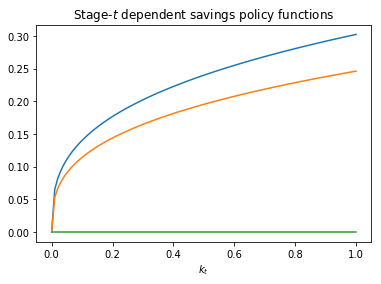

In [101]:
plt.figure()
for t in range(len(g_list_exact)):  
    # Analytical solution
    if θ == 1.0:
        plt.plot(X, g_list_exact[t])
    else:
        print("D'oh! Move along, nothing here to see...")
    plt.xlabel("$k_{t}$")
plt.title("Stage-$t$ dependent savings policy functions")
plt.show() 

Now we will solve the *backward induction* problem directly using the Bellman equation.

We'll compare our numerical results with this plot of the exact decision functions later.

Now can you superimpose your backward induction on the Bellman equation solution, onto the analytical solution?

## Exercise 1

Consider the same economy above, but now $T \rightarrow +\infty$, so that now, $\mathbf{c} \equiv (c_{0}, c_{1}, ...)$. We need to also discount each date-$t$ utility by the factor $\beta^{t}$, where $\beta \in (0,1)$. 

1. Write down the infinite-horizon mathematical programming problem (i.e., the infinite-consumption-sequence planning problem), *precisely*. (For instance, write down a Lagrangean problem but be precise in your notation.)

2. Now re-write the problem as a recursive two-period problem (i.e., the Bellman equation).

3. Prove that there exists a unique solution to the Bellman equation. (*Hint*: The space of continuous functions on a bounded domain is *compact*. Show how you can apply Banach's fixed point theorem.)

## Exercise 2 (Analytical beefcaking)

Your theoretical result above also implies a particular computational algorithm: The *method of successive approximation* of the value function. Use this idea to derive (using pencil and paper) the solution in term of a pair of (*a priori* unknown) functions---the consumption policy function $k_{t} \mapsto g(k_{t}) = c_{t}$, and, the value function $k_{t} \mapsto V(k_{t})$. 

Make sure your high-school elementary algebra and calculus is tight!

## Exercise 3 (Computational beefcaking)

Now write down a pseudocode for and implement a Python solution to the problem from **Exercise 1**. Plot the analytical results you derived in **Exercise 2** against your numerical solution here. To do the plotting comparisons use the parameter settings from **Exercise 0**.

## Exercise 4 (More beefcaking)

Show, by induction, that the solution to **Exercise 0** converges to the same solution in **Exercise 2**, as $T \rightarrow +\infty$.

## Exercise 5

You can re-purpose the finite-horizon code from above. Show how you can use that to compute the same model except that now $T \rightarrow +\infty$.

## Optional exercise for the serious student

Under some conditions, the Bellman operator also implies a dual recursive operator in the form of an Euler equation and resource constraint system. Our template optimal growth model above is a prime example.

1. Show how you can derive the Euler functional equation together with the dynamic resource constraint. Hint: Combine the first-order condition on the RHS of the Bellman equation and exploit a version of the envelope theorem (due to Benveniste and Scheinkman).

2. What is the economic interpretation of this alternative Euler-equation description of the decision maker's optimal plan?

3. Devise a code recipe or pseudocode for computing the fixed point of this system of first order conditions: i.e., the Euler equation and the recursive resource constraint. Hint: The fixed point you seek is now in terms of the decision function directly.

4. Implement your code and solve for the fixed point (optimal decision function) directly.